In [ ]:
!python --version
!pip install --upgrade pip

Python 3.10.12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
Model1_pred = pd.read_excel("media_output_labels.xlsx", index_col=0)
Model2_pred = pd.read_excel("yolo_output_labels.xlsx", index_col=0)

In [ ]:
Model1_pred.head()

,Actual_class,Predicted_class,Prob
S.No,,,
1,D2-Calling,D2-Calling,0.56
2,D4-Reach-Behind,D4-Reach-Behind,0.99
3,D4-Reach-Behind,D4-Reach-Behind,0.98
4,D1-Texting,D1-Texting,0.95
5,D3-Drinking,D3-Drinking,1.00


In [ ]:
Confusion_M1= pd.crosstab(Model1_pred.Predicted_class,Model1_pred.Actual_class)
Confusion_M2= pd.crosstab(Model2_pred.Predicted_class,Model2_pred.Actual_class)

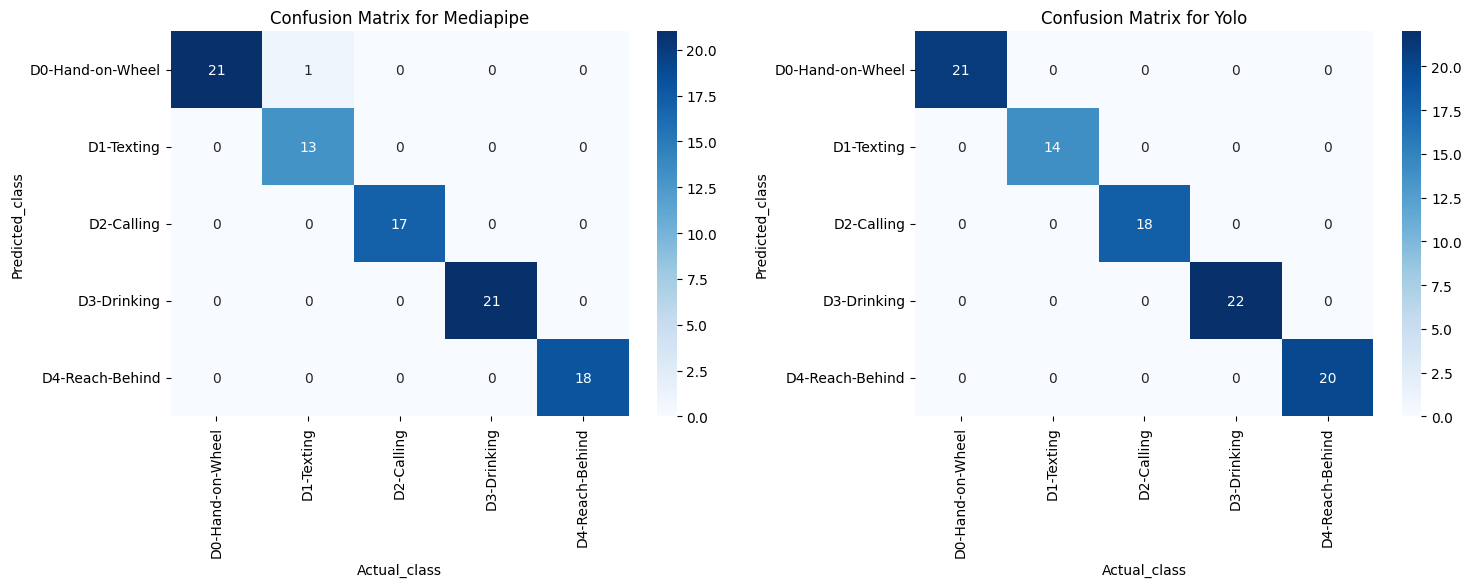

In [ ]:
fig = plt.figure(figsize=(17,5))
ax1 = plt.subplot(121)
sn.heatmap(Confusion_M1, annot=True, cmap='Blues')
ax1.set_title('Confusion Matrix for Mediapipe')
ax2 = plt.subplot(122)
sn.heatmap(Confusion_M2, annot=True, cmap='Blues')
ax2.set_title('Confusion Matrix for Yolo')
plt.subplots_adjust(wspace=0.3)

In [ ]:
np.diag(Confusion_M1).sum()

90

In [ ]:
(Confusion_M1).sum()

,0
Actual_class,
D0-Hand-on-Wheel,21
D1-Texting,14
D2-Calling,17
D3-Drinking,21
D4-Reach-Behind,18


Total Sum of Validation Images

In [ ]:
(Confusion_M1).sum().sum()

91

Accuracy = Diagonal Sum / Total Sum of Images

In [ ]:
np.diag(Confusion_M1).sum()/(Confusion_M1).sum().sum()

0.989010989010989

In [ ]:
TP = Confusion_M1.iloc[0,0]
FP = Confusion_M1.iloc[0,:].sum()-TP
FN = Confusion_M1.iloc[:,0].sum()-TP
TN = Confusion_M1.sum().sum() - TP-FP-FN
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precession = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_Score = 2 * Precession * Recall / (Precession + Recall)

In [ ]:
for i in range(Confusion_M1.shape[0]):
  TP = Confusion_M1.iloc[i,i]
  FP = Confusion_M1.iloc[i,:].sum()-TP
  FN = Confusion_M1.iloc[:,i].sum()-TP
  TN = Confusion_M1.sum().sum() - TP-FP-FN
  Accuracy = (TP+TN)/(TP+TN+FP+FN)
  Precession = TP/(TP+FP)
  Recall = TP/(TP+FN)
  F1_Score = 2 * Precession * Recall / (Precession + Recall)
  print(Confusion_M1.index[i],Accuracy, Precession, Recall, F1_Score)

D0-Hand-on-Wheel 0.989010989010989 0.9545454545454546 1.0 0.9767441860465117
D1-Texting 0.989010989010989 1.0 0.9285714285714286 0.962962962962963
D2-Calling 1.0 1.0 1.0 1.0
D3-Drinking 1.0 1.0 1.0 1.0
D4-Reach-Behind 1.0 1.0 1.0 1.0


Analysis Mediapipe

In [ ]:
pd.DataFrame(classification_report(Model1_pred.Actual_class, Model1_pred.Predicted_class, output_dict=True)).T

,precision,recall,f1-score,support
D0-Hand-on-Wheel,0.954545,1.000000,0.976744,21.000000
D1-Texting,1.000000,0.928571,0.962963,14.000000
D2-Calling,1.000000,1.000000,1.000000,17.000000
D3-Drinking,1.000000,1.000000,1.000000,21.000000
D4-Reach-Behind,1.000000,1.000000,1.000000,18.000000
accuracy,0.989011,0.989011,0.989011,0.989011
macro avg,0.990909,0.985714,0.987941,91.000000
weighted avg,0.989510,0.989011,0.988935,91.000000


Analysis Yolo

In [ ]:
pd.DataFrame(classification_report(Model2_pred.Actual_class, Model2_pred.Predicted_class, output_dict=True)).T

,precision,recall,f1-score,support
D0-Hand-on-Wheel,1.0,1.0,1.0,21.0
D1-Texting,1.0,1.0,1.0,14.0
D2-Calling,1.0,1.0,1.0,18.0
D3-Drinking,1.0,1.0,1.0,22.0
D4-Reach-Behind,1.0,1.0,1.0,20.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,95.0
weighted avg,1.0,1.0,1.0,95.0
